In [2]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
import os
os.chdir("C:/pytest")

In [6]:
import chardet # pip install chardet
f = open("C:/pytest/ratings_small.txt", "rb").read()
encoding = chardet.detect(f)
print(encoding['encoding'])

{'encoding': 'CP949', 'confidence': 0.99, 'language': 'Korean'}
CP949


In [ ]:
def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        # 파일을 한줄씩 읽어 탭 컬럼을 하나씩 리스트 원소로 넣음
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:] 
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)
    data = read_data('ratings_small.txt' , encoding='cp949')

In [13]:
def read_data(filename, encoding=None, start=1):
    if not encoding:
        import chardet # pip install chardet
        f = open(filename, "rb").read()
        encoding_raw = chardet.detect(f)
        encoding = encoding_raw['encoding']
    with open(filename, 'r', encoding=encoding) as f:
        # 파일을 한줄씩 읽어 탭 컬럼을 하나씩 리스트 원소로 넣음, 중첩리스트
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:] 
    return data

def write_data(data, filename, encoding=None):
    if not encoding:
        encoding='cp949'
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)
# data = read_data('ratings_small.txt')

In [15]:
data = read_data('ratings_small.txt')

In [22]:
data[:2]

[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'],
 ['8132799',
  '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."',
  '1']]

In [16]:
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


In [18]:
data[0][1]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [29]:
len_data=[]
for d in data:
    # d -> 사용자별 [id, comment, 긍1부정0] 한 세트가 들어감
    len_data.append(len(d[1].split())) # comment를 공백단위로 분리(어절)해 리스트로 만들어 그 길이를 len_data에 넣는다.
print(data[0][1])
print("첫번째 문장의 어절 길이:", len_data[0])

어릴때보고 지금다시봐도 재밌어요ㅋㅋ
첫번째 문장의 어절 길이: 3


In [26]:
# del(len_data1)
for d in data:
    len_data1 = []
    len_data1.append(len(d[1].split()))
print("첫번째 문장의 어절 길이:", len_data1[0])

첫번째 문장의 어절 길이: 1


In [46]:
import numpy as np
print('텍스트 최대 길이(100): {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이(50): {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 2 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 50)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))
print('제 4 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 100)))
print('95% 구간 텍스트 길이: {}'.format(np.percentile(len_data, 95)))
print('99% 구간 텍스트 길이: {}'.format(np.percentile(len_data, 99)))

텍스트 최대 길이(100): 36
텍스트 최소 길이: 1
텍스트 평균 길이: 7.51
텍스트 길이 표준편차: 6.53
텍스트 중간 길이(50): 6.0
제 1 사분위 텍스트 길이: 3.0
제 2 사분위 텍스트 길이: 6.0
제 3 사분위 텍스트 길이: 9.0
제 4 사분위 텍스트 길이: 36.0
95% 구간 텍스트 길이: 23.0
99% 구간 텍스트 길이: 31.00999999999999


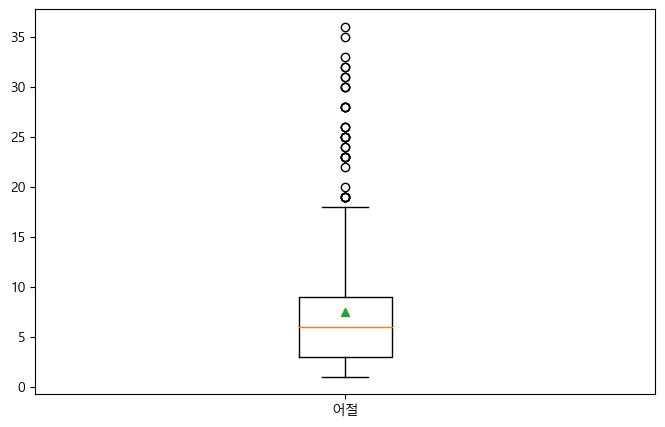

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.boxplot([len_data], labels=['어절'], showmeans=True)
plt.show()

In [51]:
for i in range(0,101):
    print(i, np.percentile(len_data, i))

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 2.0
12 2.0
13 2.0
14 2.0
15 2.0
16 2.0
17 3.0
18 3.0
19 3.0
20 3.0
21 3.0
22 3.0
23 3.0
24 3.0
25 3.0
26 3.0
27 3.0
28 3.7200000000000273
29 4.0
30 4.0
31 4.0
32 4.0
33 4.0
34 4.0
35 4.0
36 4.0
37 4.0
38 4.0
39 5.0
40 5.0
41 5.0
42 5.0
43 5.0
44 5.0
45 5.0
46 5.0
47 5.0
48 5.0
49 6.0
50 6.0
51 6.0
52 6.0
53 6.0
54 6.0
55 6.0
56 6.0
57 6.42999999999995
58 7.0
59 7.0
60 7.0
61 7.0
62 7.0
63 7.0
64 8.0
65 8.0
66 8.0
67 8.0
68 8.0
69 8.0
70 8.0
71 9.0
72 9.0
73 9.0
74 9.0
75 9.0
76 9.0
77 10.0
78 10.0
79 10.0
80 10.0
81 11.0
82 11.0
83 11.0
84 12.0
85 12.0
86 13.0
87 14.0
88 14.0
89 15.0
90 16.0
91 17.0
92 17.08000000000004
93 19.0
94 20.11999999999989
95 23.0
96 25.0
97 26.0
98 28.039999999999964
99 31.00999999999999
100 36.0


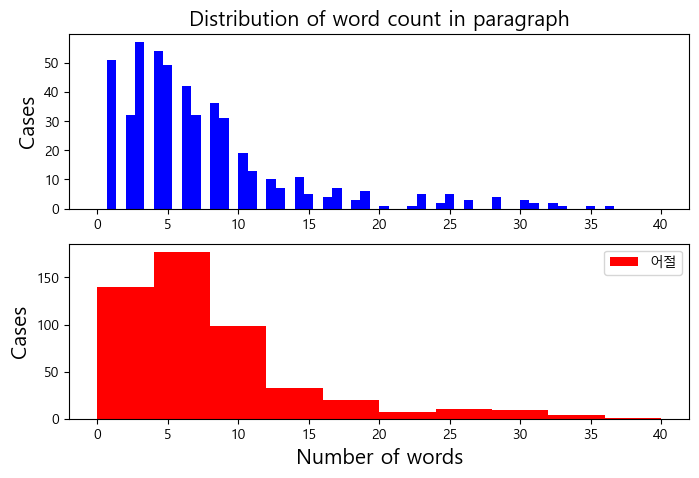

In [71]:
plt.figure(figsize=(8, 5))
plt.subplot(211)
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.hist(len_data, bins=60, range=[0,40], facecolor='b', density=False, label='어절')
plt.ylabel('Cases', fontsize=15)
plt.subplot(212)
plt.hist(len_data, range=[0,40], facecolor='r', density=False, label='어절')
plt.ylabel('Cases', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.show()

In [77]:
import rhinoMorph
rn = rhinoMorph.startRhino()

sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data:', sample_data)
print('joined sample data:', ' '.join(sample_data)) # 영어와 유사한 상태
morphs, poses = rhinoMorph.wholeResult_list(rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True) # 공문서와 같이 전문 公 문서 일 경우 유용
print('\n형태소 분석 결과: ')
print('morphs: ', morphs)
print('poses: ', poses)

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ

형태소 분석 결과: 
morphs:  ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
poses:  ['VA', 'NNG', 'VV', 'NNG', 'MAG', 'VV', 'VA', 'IC']


In [88]:
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi= True)
    joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
    if joined_data_each: # 내용이 있는 경우만 저장하게 함
        morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"
# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt')
print(morphed_data[:300])

8112052	어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ	1
8132799	디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사	1
4655635	폴리스스토리 시리즈 뉴 없다 최고	1
9251303	와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화	1
10067386	안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화	1
2190435	사랑 해보다 사람 처음 끝 웃다 있다 영화	1
927


In [89]:
data = read_data('ratings_morphed.txt', start=0)
print(len(data))
print(len(data[0]))
data_text = [line[1] for line in data] # comment list
data_senti = [line[2] for line in data] # 긍1부1정 list

495
3


In [91]:
len_data = []
for d in data_text:
    len_data.append(len(d.split()))
print("첫번째 문장의 형태소 길이:", len_data[0])
data_text[0]

첫번째 문장의 형태소 길이: 8


'어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ'

In [92]:
print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))

텍스트 최대 길이: 38
텍스트 최소 길이: 1
텍스트 평균 길이: 8.94
텍스트 길이 표준편차: 7.29
텍스트 중간 길이: 7.0
제 1 사분위 텍스트 길이: 4.0
제 3 사분위 텍스트 길이: 11.0


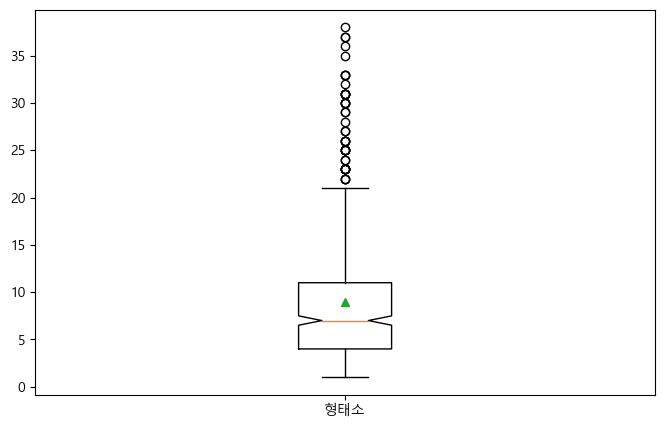

In [94]:
plt.figure(figsize=(8, 5))
plt.boxplot([len_data], labels=['형태소'], notch=True, showmeans=True)
plt.show()

In [98]:
len(len_data)+10

505

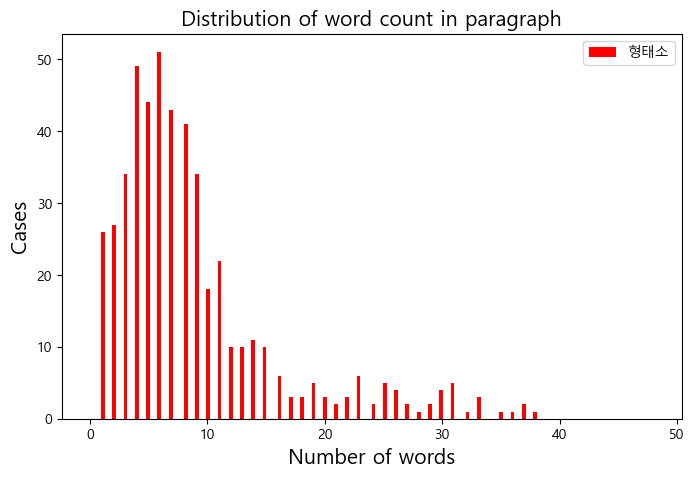

In [101]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=150, range=[0, max(len_data)+10], facecolor='r', density=False, label='형태소')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

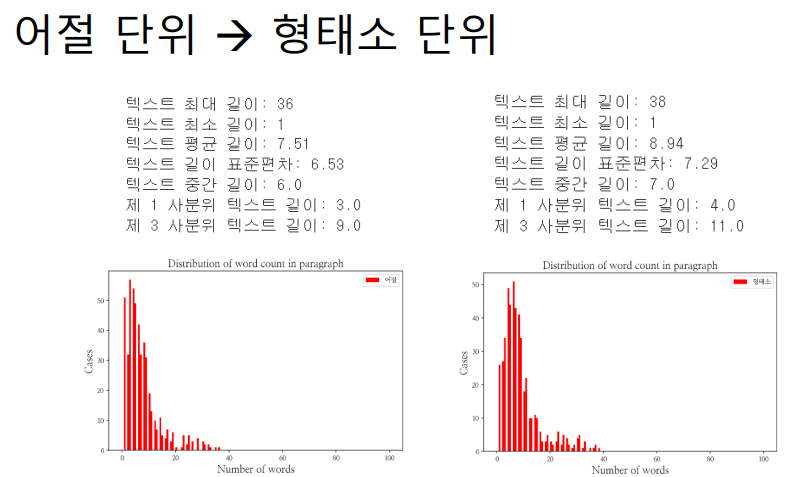

In [102]:
from collections import Counter
count = Counter(["여름", "과일", "봄", "딸기", "과일", "봄", "딸기", "봄"])
result = count.most_common(3)
print("count: ", count)
print("result: ", result)
print("result[0]", result[0])
print("result[0][0]: ", result[0][0])
print("result[0][1]: ", result[0][1])

count:  Counter({'봄': 3, '과일': 2, '딸기': 2, '여름': 1})
result:  [('봄', 3), ('과일', 2), ('딸기', 2)]
result[0] ('봄', 3)
result[0][0]:  봄
result[0][1]:  3


In [111]:
data_text_freq = Counter(data_text)
# print('data_text:', data_text_freq)
data_text_freq

Counter({'어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ': 1,
         '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사': 1,
         '폴리스스토리 시리즈 뉴 없다 최고': 1,
         '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화': 1,
         '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화': 1,
         '사랑 해보다 사람 처음 끝 웃다 있다 영화': 1,
         '완전 감동 다시다 감동': 1,
         '개들 전쟁 나오다 나오다 1빠 보다': 1,
         '굿': 3,
         '바보 병': 1,
         '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다': 1,
         '재미있다': 2,
         '고질라 무 귀엽다 ㅋㅋ': 1,
         '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다': 1,
         '반전 좋다 ^^': 1,
         '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다': 1,
         '네고시에이터 소재 같다 아무런 관련 없다': 1,
         '단연 최고': 1,
         '가다 갈수록 더욱 빠지다 밀회 화이팅': 1,
         '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품': 1,
         '오랜만 보다 제대로 되다 범죄 스릴러': 1,
         '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태': 1,
         '마지막 씬 잊다 없다': 1,
         '강압적

In [116]:
mergedTextList = ' '.join(data_text).split()
mergedTextList

['어리다',
 '때',
 '보다',
 '지금',
 '다시',
 '보다',
 '재미있다',
 'ㅋㅋ',
 '디자인',
 '배우다',
 '학생',
 '외국',
 '디자이너',
 '일구다',
 '전통',
 '통하다',
 '발전',
 '문화',
 '산업',
 '부럽다',
 '사실',
 '우리나라',
 '그',
 '어렵다',
 '시절',
 '끝',
 '열정',
 '지키다',
 '노라노',
 '같다',
 '전통',
 '있다',
 '같다',
 '사람',
 '꿈',
 '꾸다',
 '이루다',
 '나가다',
 '있다',
 '감사',
 '폴리스스토리',
 '시리즈',
 '뉴',
 '없다',
 '최고',
 '와',
 '연기',
 '진짜',
 '쩔다',
 '지루',
 '생각하다',
 '몰입',
 '그래',
 '이런',
 '진짜',
 '영화',
 '안개',
 '자욱',
 '하다',
 '밤하늘',
 '뜨다',
 '초승달',
 '같다',
 '영화',
 '사랑',
 '해보다',
 '사람',
 '처음',
 '끝',
 '웃다',
 '있다',
 '영화',
 '완전',
 '감동',
 '다시다',
 '감동',
 '개들',
 '전쟁',
 '나오다',
 '나오다',
 '1빠',
 '보다',
 '굿',
 '바보',
 '병',
 '나이',
 '같다',
 '영화',
 '지금',
 '보다',
 '감동적',
 '하지만',
 '훗날',
 '다시',
 '보다',
 '대사',
 '하나하나',
 '그',
 '감정',
 '완벽',
 '하다',
 '이해하다',
 '같다',
 '재미있다',
 '고질라',
 '무',
 '귀엽다',
 'ㅋㅋ',
 '영화',
 '오페라',
 '작품',
 '극단적',
 '평',
 '갈리다',
 '어쩌다',
 '없다',
 '반전',
 '좋다',
 '^^',
 '평점',
 '왜',
 '낮다',
 '긴장감',
 '스릴감',
 '진짜',
 '최고',
 '진짜',
 '전장',
 '느끼다',
 '공포',
 '생생',
 '전하다',
 '네고시에이터',
 '소재',
 '같다',
 '아무런',
 '관련',
 

In [117]:
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다", "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]

In [118]:
# 본문의 단어리스트(mergedTextList) 중 한개(word)를 뽑은 것이 불용어목록(stopwords_ko)에 속하지 않으면 mergedTextList_no_stopwords 리스트에 넣는다.
mergedTextList_no_stopwords = [word for word in mergedTextList if not word in stopwords_ko]

In [121]:
len(mergedTextList), len(mergedTextList_no_stopwords)

(4423, 3837)

In [126]:
sample = {'여름':1, '과일':2, '딸기':3}
print(sorted(sample))
print(sorted(sample, reverse=True))
print(sorted(sample, key=sample.get, reverse=True)) # sample.get의 출력된 값을 기준으로 sample을 정렬
print(sorted(sample.values(), reverse=True)) 

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


In [136]:
l = ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'D']
word = "".join(l)
sorted(word, key=word.find)

['A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'D']

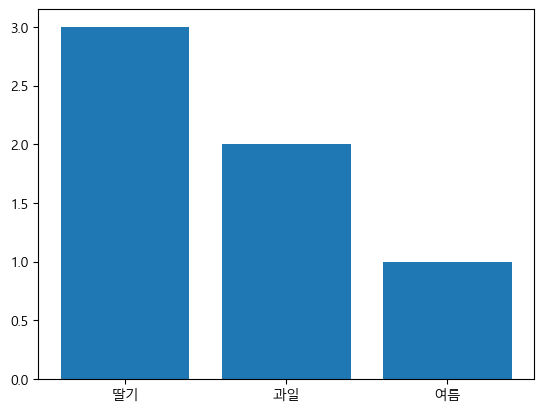

In [137]:
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

plt.bar(range(len(wordInfo_sample)), sorted_values_sample)
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)
plt.show()

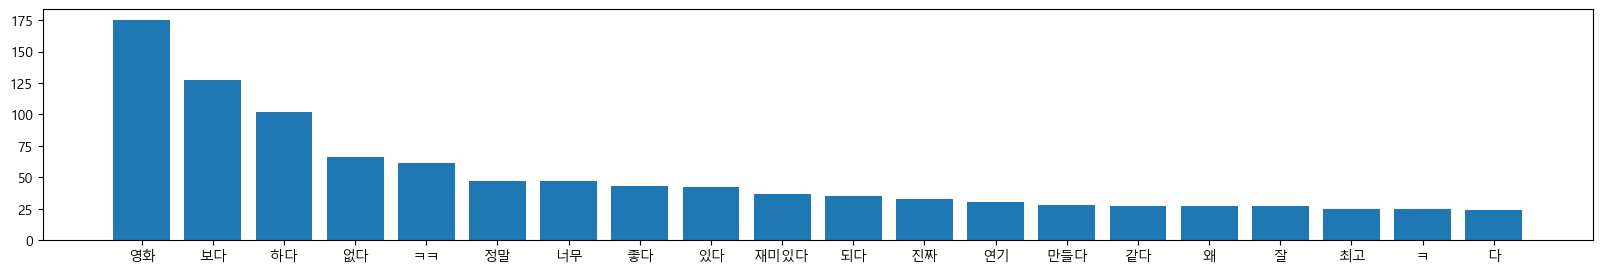

In [140]:
wordInfo = Counter(mergedTextList) 
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

plt.figure(figsize=(20,3))
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

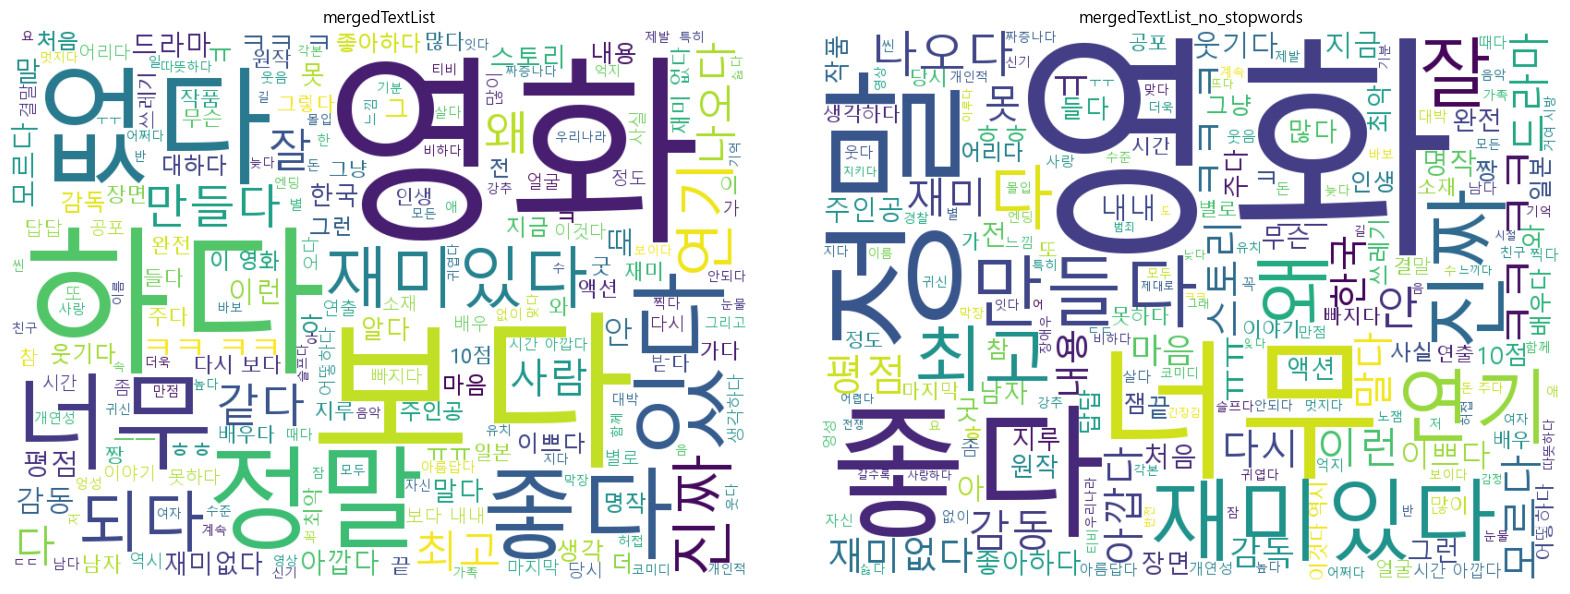

In [159]:
# !pip install wordcloud

font_path = 'C:/Windows/Fonts/malgun.ttf'
from wordcloud import WordCloud

linedata1=' '.join(mergedTextList)
cloud1 = WordCloud(font_path=font_path, width=800, height=600, background_color='white').generate(linedata1)
linedata2=' '.join(mergedTextList_no_stopwords)
cloud2 = WordCloud(font_path=font_path, width=800, height=600, background_color='white').generate(linedata2)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(cloud1, interpolation='bilinear')
plt.axis(False)
plt.title("mergedTextList")

plt.subplot(122)
plt.imshow(cloud2, interpolation='bilinear')
plt.axis('off')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.1, hspace=0)
plt.title("mergedTextList_no_stopwords")

plt.show()

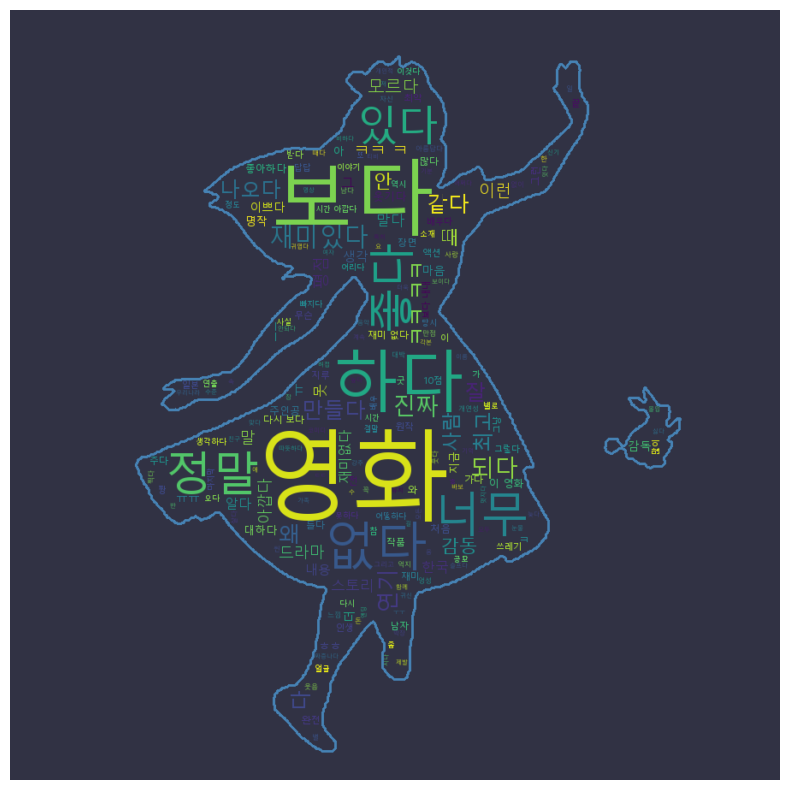

In [165]:
from PIL import Image

alice_mask = np.array(Image.open("c:\\pytest\\alice.png"))
cloud = WordCloud(font_path=font_path, width=800, height=600, background_color='#313244', contour_width=3, contour_color='steelblue', mask=alice_mask).generate(linedata1)
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

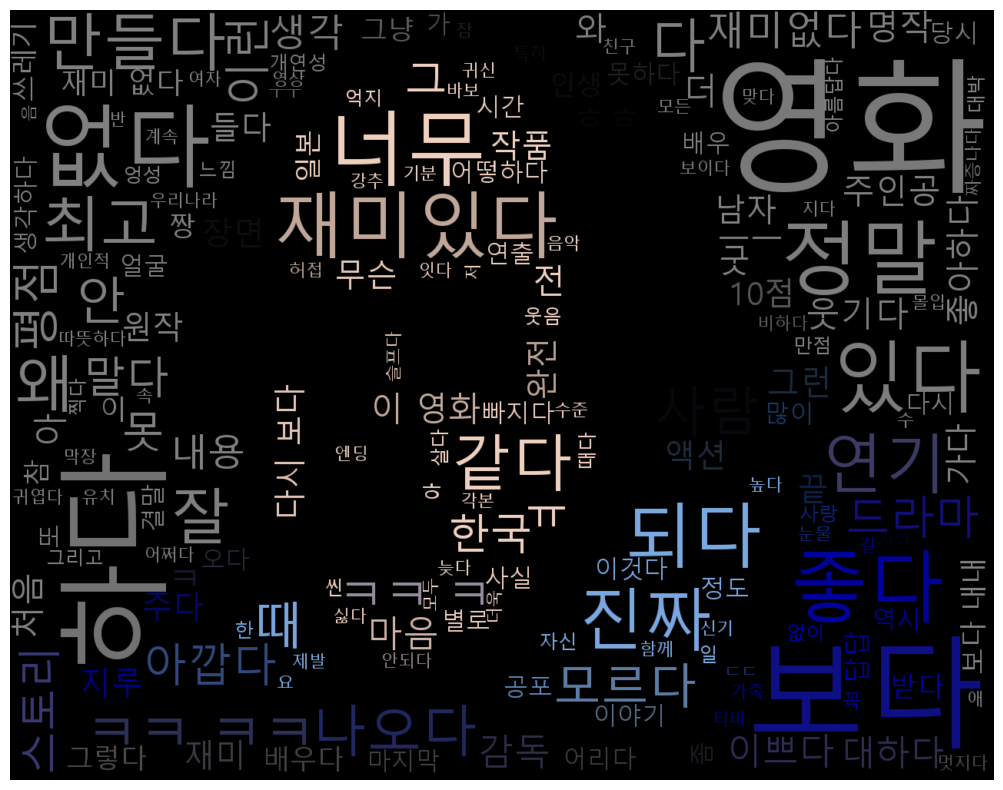

In [195]:
from scipy import ndimage
from wordcloud import WordCloud, ImageColorGenerator 
image = np.array(Image.open("c:\\pytest\\william_shakespeare.png"))

image_mask = image.copy()
image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([ndimage.gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .1] = 255
wc = WordCloud(font_path=font_path, background_color='black', mask=image_mask, mode='RGBA')
wc.generate(linedata1)
image_colors = ImageColorGenerator(image)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
# wc.to_file("color_masked_wordcloud.png")
plt.axis('off')
plt.show()

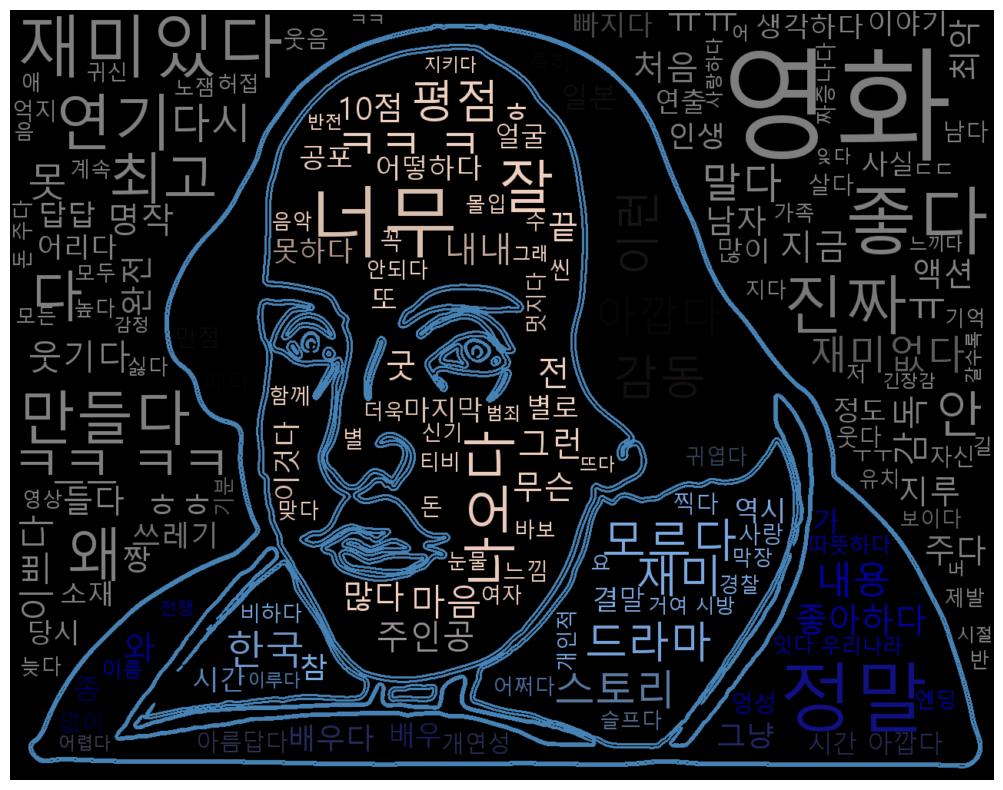

In [213]:
from scipy import ndimage
from wordcloud import WordCloud, ImageColorGenerator 

image = Image.open("c:\\pytest\\william_shakespeare.png")
# image = image.resize((1200,900))

image = np.array(image)

image_mask = image.copy()
image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([ndimage.gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .05] = 255
wc = WordCloud(font_path=font_path, contour_width=3, contour_color='steelblue', background_color='black', mask=image_mask, mode='RGB')
wc.generate(linedata2)
image_colors = ImageColorGenerator(image)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
# wc.to_file("color_masked_wordcloud.png")
plt.axis('off')
plt.show()

In [215]:
len(image)

1002

### 연습문제 1

In [227]:
path = "c:\\pytest\\"
with open(path+"윤동주시.txt", encoding='utf-8') as f:
    윤동주시 = f.read()
with open(path+"김소월시.txt", encoding='utf-8') as f:
    김소월시 = f.read()

In [261]:
def preprocessing(text):
    text=text.replace('\n\n', '\n')
    text_list=[i.strip() for i in  text.split('\n') if i.strip()!='']
    text_merged = ' '.join(text_list)
    return text_list, text_merged

In [271]:
def 키워드추출(word_list):
    import rhinoMorph
    rn = rhinoMorph.startRhino()
    morph = rhinoMorph.onlyMorph_list(rn, word_list, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    return morph

In [432]:
def 단어비율(키워드_리스트, out=True):
    from collections import Counter
    stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다", "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]
    불용어제거_키워드 = [word for word in 키워드_리스트 if word not in stopwords_ko]
    키워드_dict = Counter(불용어제거_키워드)
    total_sum = sum(Counter(불용어제거_키워드).values())

    sorted_keys_rate = sorted(키워드_dict, key=키워드_dict.get, reverse=True)
    sorted_values_rate = sorted(키워드_dict.values(), reverse=True)
    keyword_list = []
    keyword_rate = []
    for k in 키워드_dict:
        keyword_list.append(k)
        keyword_rate.append(f"{키워드_dict[k]/total_sum*100:.2f}")
    if out:
        print(f"단어빈도 총합: {total_sum}")
        print(f"고빈도 단어    : {sorted_keys_rate[:20]}")
        print(f"고빈도 단어비율: {[round(i/total_sum*100,2) for i in sorted_values_rate][:20]}")
        return 불용어제거_키워드
    else:
        return 키워드_dict

In [428]:
def 워드클라우드(키워드_list):
    키워드_list = ' '.join(키워드_list)
    from wordcloud import WordCloud
    cloud = WordCloud(font_path="c:\\windows\\fonts\\malgun.ttf", width=800, height=600).generate(키워드_list)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [328]:
윤동주시_후처리_list, 윤동주시_merged = preprocessing(윤동주시)
김소월시_후처리_list, 김소월시_merged = preprocessing(김소월시)
윤동주시_키워드 = 키워드추출(윤동주시_merged)
김소월시_키워드 = 키워드추출(김소월시_merged)

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


김소월시
단어빈도 총합: 638
고빈도 단어    : ['잊다', '살다', '못', '울다', '그립다', '죽다', '꽃', '멀다', '길', '밤', '저', '들다', '모르다', '피다', '이름', '넘다', '저녁', '부르다', '새다', '눈']
고빈도 단어비율: [2.66, 2.35, 1.57, 1.57, 1.41, 1.41, 1.41, 1.25, 1.25, 1.1, 1.1, 0.94, 0.94, 0.94, 0.94, 0.78, 0.78, 0.78, 0.78, 0.78]


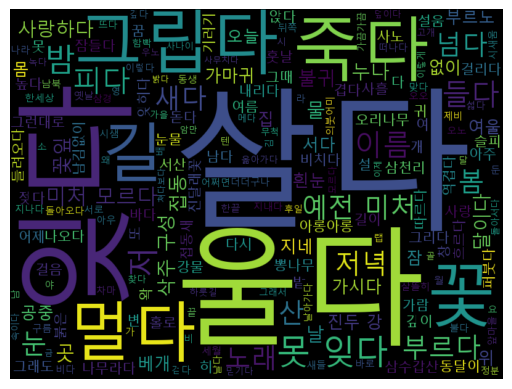

In [429]:
print("김소월시")
워드클라우드(단어비율(김소월시_키워드))

윤동주시
단어빈도 총합: 288
고빈도 단어    : ['내일', '사나이', '오늘', '길', '다', '남다', '어느', '돌아가다', '밤', '까닭', '새롭다', '아우', '바람', '봄', '발자취', '소리', '듣다', '별', '헤다', '지나가다']
고빈도 단어비율: [2.78, 2.08, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.04, 1.04, 1.04, 1.04, 1.04, 1.04, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69]


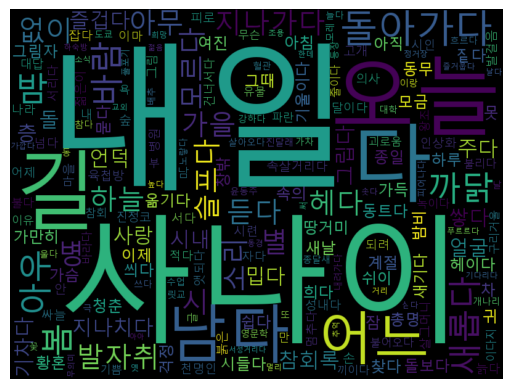

In [433]:
print("윤동주시")
워드클라우드(단어비율(윤동주시_키워드))

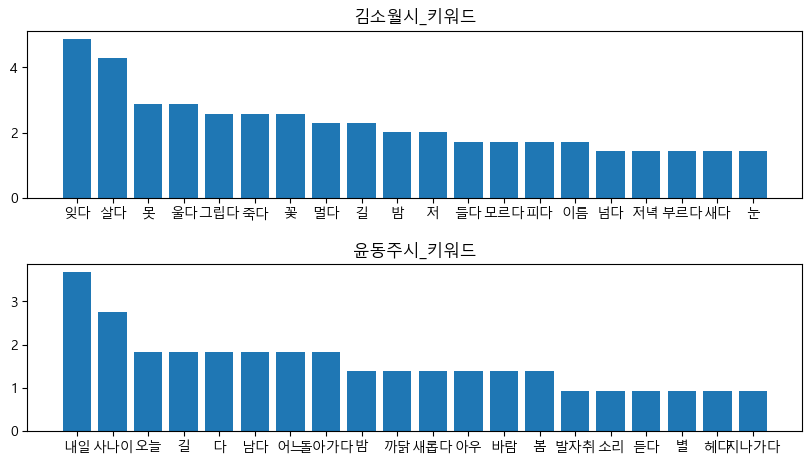

In [439]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(211)
rate = 단어비율(김소월시_키워드, False)
sorted_keys_rate = sorted(rate, key=rate.get, reverse=True)
sorted_values_rate = sorted(rate.values(), reverse=True)
sorted_values_rate_20 = [round(i/len(rate)*100,2) for i in sorted_values_rate][:20]
plt.bar(range(20), sorted_values_rate_20[:20])
plt.xticks(range(20), sorted_keys_rate[:20])
plt.title("김소월시_키워드")

plt.subplot(212)
rate = 단어비율(윤동주시_키워드, False)
sorted_keys_rate = sorted(rate, key=rate.get, reverse=True)
sorted_values_rate = sorted(rate.values(), reverse=True)
sorted_values_rate_20 = [round(i/len(rate)*100,2) for i in sorted_values_rate][:20]
plt.bar(range(20), sorted_values_rate_20[:20])
plt.xticks(range(20), sorted_keys_rate[:20])
plt.title("윤동주시_키워드")

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4)
plt.show()